In [254]:
#docstring here - what does the code do?

In [255]:
#import modules (straight from wk2&3 so far) - do i need more?
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs

#enable interactive plotting
plt.ion()

In [256]:
#Define functions
#generate handles to create legend for map features
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [257]:
# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)


In [258]:
#load lga vector outline polygon for central highlands, check row header and CRS
lga = gpd.read_file('data/tas_lga.shp')
print(lga.head())

        LG_PLY_PID          LGA_PID             LGA_NAME     ABB_NAME STATE  \
0  lgp2e684100bbc7  lga5f9b3011df30  Break O'Day Council  Break O'Day   TAS   
1  lgp402890785b9d  lga5f9b3011df30  Break O'Day Council  Break O'Day   TAS   
2  lgp53e14f7c09e8  lga5f9b3011df30  Break O'Day Council  Break O'Day   TAS   
3  lgp566d3f8ff708  lga5f9b3011df30  Break O'Day Council  Break O'Day   TAS   
4  lgp58551735ceaa  lga5f9b3011df30  Break O'Day Council  Break O'Day   TAS   

                                            geometry  
0  POLYGON ((148.34616 -40.98751, 148.34618 -40.9...  
1  POLYGON ((148.32977 -40.92128, 148.32975 -40.9...  
2  POLYGON ((148.34611 -40.98577, 148.34612 -40.9...  
3  POLYGON ((148.32837 -41.24787, 148.32839 -41.2...  
4  POLYGON ((148.32170 -40.92134, 148.32172 -40.9...  


In [259]:
#load land vector polygons for tasmania, check row header and CRS
land = gpd.read_file('data/land_100k.shp')
print(land.head())

     LS_REGION     RAINFALL  \
0  King Island   750-1000mm   
1  King Island   750-1000mm   
2  King Island  1000-1250mm   
3  King Island   750-1000mm   
4  King Island   750-1000mm   

                                             GEO_AGE  \
0                                 Siliurian-Devonian   
1                                 Siliurian-Devonian   
2  Lower Devonian-Tremadocian-Cambrian (Mathinna ...   
3                                 Siliurian-Devonian   
4                                 Siliurian-Devonian   

                                                ROCK   ALTITUDE  \
0           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   
1           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   
2  Sedimentary calcareous (e.g. limestone, dolomite)  0 to 300m   
3           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   
4           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   

                    LANDFORM  \
0  Coastal dunes and beaches   
1  Coasta

In [260]:
#load water vector polygons for tasmania, check row header and CRS
water = gpd.read_file('data/water.shp')
print(water.head())

   WB_ID           WB_NAME       WB_AREA    WB_ELEV  SUBCAT_ID     WB_MAP  \
0   37.0  Pearshape Lagoon  76739.706135  67.955810    10007.0  PEARSHAPE   
1   38.0              None  15753.090750   1.170759    47044.0    SELLARS   
2   39.0              None  77035.664648   1.199716    47044.0    SELLARS   
3   40.0              None  10551.538700   0.192473    47046.0      LOGAN   
4   41.0              None  11750.059306   2.025227    47046.0      LOGAN   

                       WB_INFO    SHAPE_AREA    SHAPE_LEN  \
0  https://wrt.tas.gov.au/cfev  76739.706135  1149.462374   
1  https://wrt.tas.gov.au/cfev  15753.090750   524.353991   
2  https://wrt.tas.gov.au/cfev  77035.664648  1167.638141   
3  https://wrt.tas.gov.au/cfev  10551.538700   554.163424   
4  https://wrt.tas.gov.au/cfev  11750.059306   589.776428   

                                            geometry  
0  POLYGON ((237371.256 5561317.364, 237390.755 5...  
1  POLYGON ((606643.582 5561066.260, 606657.882 5...  
2  PO

In [261]:
#load roads vector lines for tasmania, check row header and CRS
roads = gpd.read_file('data/tas_roads.shp')
print(roads.head())

  REGION ROAD_NO       ROAD_NAME  START_CHNG  END_CHNG  LANE_KM  \
0     NE   A0087     Midland Hwy        0.00      0.80     0.80   
1     NE   A0087     Midland HWY        3.38      3.72     0.33   
2     NE   A1468    Illawarra MR        2.72      2.89     0.17   
3      S   A0498   South Arm HWY        0.00      0.02     0.02   
4     NE   A1565  Lady Barron MR        0.00      9.46    18.92   

               ROAD_CAT                                           geometry  
0            Trunk Road  LINESTRING (512389.184 5397211.740, 512425.095...  
1            Trunk Road  LINESTRING (514982.907 5396553.993, 514978.202...  
2            Trunk Road  LINESTRING (509665.705 5396414.450, 509683.641...  
3  Regional Access Road  LINESTRING (533241.099 5252633.985, 533250.220...  
4            Other Road  LINESTRING (599521.087 5552896.323, 599527.951...  


In [262]:
#load boreholes vector points for tasmania, check row header and CRS
bhs = gpd.read_file('data/drill_eng_geo.shp')
print(bhs.head())

   DRILL_ID     NAME                       KEYWORDS              PURPOSE  \
0     614.0  Bore 1M  Tarraleah - Butlers Gorge Dam  Engineering geology   
1     616.0  Bore 4L  Tarraleah - Butlers Gorge Dam  Engineering geology   
2     617.0  Bore 5L  Tarraleah - Butlers Gorge Dam  Engineering geology   
3     618.0  Bore 3M  Tarraleah - Butlers Gorge Dam  Engineering geology   
4     620.0  Bore 7L  Tarraleah - Butlers Gorge Dam  Engineering geology   

                     COMPANY DRILL_TYPE DATE_DRILL  LENGTH  AZIMUTH  DIP  \
0  Hydro Electric Commission    Diamond    01/1938    26.0      0.0  0.0   
1  Hydro Electric Commission    Diamond    01/1938    22.0      0.0  0.0   
2  Hydro Electric Commission    Diamond    01/1938    17.0      0.0  0.0   
3  Hydro Electric Commission    Diamond    01/1938     6.0      0.0  0.0   
4  Hydro Electric Commission    Diamond    01/1938    39.0      0.0  0.0   

      RL                     geometry  
0  730.0  POINT (146.26172 -42.26638)  
1  730

In [263]:
#check crs of each layer
print(lga.crs)
print(land.crs)
print(water.crs)
print(roads.crs)
print(bhs.crs)

epsg:7844
epsg:28355
epsg:28355
epsg:28355
epsg:4283


In [264]:
#change projection to match layers
#https://epsg.io/20251-8398 
lga = lga.to_crs(epsg=28355)
bhs = bhs.to_crs(epsg=28355)

In [297]:
#check all crs match, use assert to raise an error if not true
lga.crs == land.crs == water.crs == roads.crs == bhs.crs

In [296]:
#create a subset of tas lgas to get central highlands lga
#see https://geopandas.org/en/stable/gallery/plot_clip.html
ch_lga = lga[lga["LGA_NAME"] == "Central Highlands Council"]

<AxesSubplot:>

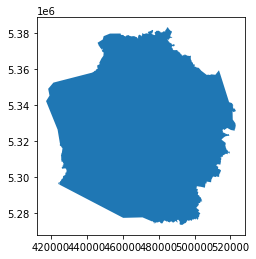

In [267]:
#plot extent of lga
ch_lga.plot()

In [268]:
#clip all state wide vector layers to central highlands lga subset
#https://geopandas.org/en/stable/docs/reference/api/geopandas.clip.html
land_clip = gpd.clip(land, ch_lga)
water_clip = gpd.clip(water, ch_lga)
roads_clip = gpd.clip(roads, ch_lga)
bhs_clip = gpd.clip(bhs, ch_lga)

<AxesSubplot:>

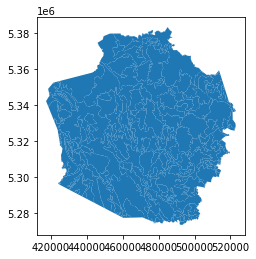

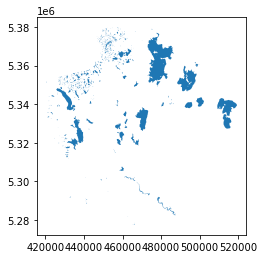

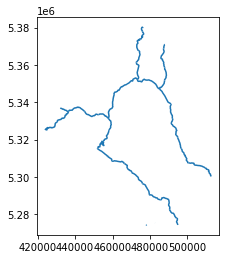

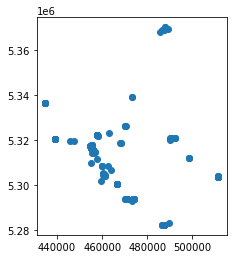

In [269]:
land_clip.plot()
water_clip.plot()
roads_clip.plot()
bhs_clip.plot()

In [270]:
#spatial join between clipped land and water layers and show table
join_lw = gpd.sjoin(land_clip, water_clip, how='inner', lsuffix='left', rsuffix='right')
print(join_lw.head())

            LS_REGION     RAINFALL            GEO_AGE  \
1113  Central Plateau  1500-2000mm  Triassic-Jurassic   
1113  Central Plateau  1500-2000mm  Triassic-Jurassic   
1113  Central Plateau  1500-2000mm  Triassic-Jurassic   
1113  Central Plateau  1500-2000mm  Triassic-Jurassic   
1113  Central Plateau  1500-2000mm  Triassic-Jurassic   

                                      ROCK      ALTITUDE           LANDFORM  \
1113  Metamorphic (e.g. quartzite, schist)  900 to 1200m  Undulating Plains   
1113  Metamorphic (e.g. quartzite, schist)  900 to 1200m  Undulating Plains   
1113  Metamorphic (e.g. quartzite, schist)  900 to 1200m  Undulating Plains   
1113  Metamorphic (e.g. quartzite, schist)  900 to 1200m  Undulating Plains   
1113  Metamorphic (e.g. quartzite, schist)  900 to 1200m  Undulating Plains   

                                               URL_LINK  \
1113  https://nrmdatalibrary.dpipwe.tas.gov.au/FactS...   
1113  https://nrmdatalibrary.dpipwe.tas.gov.au/FactS...   
1113 

In [271]:
len(join_lw)

667

In [272]:
#drop the index_right column in order to do second join (python wont allow multiple columns by same name)
join_lw.drop('index_right', axis=1, inplace=True)

In [273]:
#join bhs to land water vector
join_lwbhs = gpd.sjoin(bhs_clip, join_lw, how="inner", op="within")

In [274]:
print(join_lwbhs.head())

   DRILL_ID     NAME                       KEYWORDS              PURPOSE  \
0     614.0  Bore 1M  Tarraleah - Butlers Gorge Dam  Engineering geology   
1     616.0  Bore 4L  Tarraleah - Butlers Gorge Dam  Engineering geology   
2     617.0  Bore 5L  Tarraleah - Butlers Gorge Dam  Engineering geology   
3     618.0  Bore 3M  Tarraleah - Butlers Gorge Dam  Engineering geology   
4     620.0  Bore 7L  Tarraleah - Butlers Gorge Dam  Engineering geology   

                     COMPANY DRILL_TYPE DATE_DRILL  LENGTH  AZIMUTH  DIP  ...  \
0  Hydro Electric Commission    Diamond    01/1938    26.0      0.0  0.0  ...   
1  Hydro Electric Commission    Diamond    01/1938    22.0      0.0  0.0  ...   
2  Hydro Electric Commission    Diamond    01/1938    17.0      0.0  0.0  ...   
3  Hydro Electric Commission    Diamond    01/1938     6.0      0.0  0.0  ...   
4  Hydro Electric Commission    Diamond    01/1938    39.0      0.0  0.0  ...   

   URL_LINK   WB_ID            WB_NAME       WB_AREA    

In [275]:
len(join_lwbhs)

460

In [276]:
join_lwbhs.columns

Index(['DRILL_ID', 'NAME', 'KEYWORDS', 'PURPOSE', 'COMPANY', 'DRILL_TYPE',
       'DATE_DRILL', 'LENGTH', 'AZIMUTH', 'DIP', 'RL', 'geometry',
       'index_right', 'LS_REGION', 'RAINFALL', 'GEO_AGE', 'ROCK', 'ALTITUDE',
       'LANDFORM', 'URL_LINK', 'WB_ID', 'WB_NAME', 'WB_AREA', 'WB_ELEV',
       'SUBCAT_ID', 'WB_MAP', 'WB_INFO', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [277]:
#drop unused columns to tidy table and better view data
join_lwbhs.drop(['index_right', 'URL_LINK', 'WB_ID', 'SUBCAT_ID', 'WB_MAP', 'WB_INFO', 'PURPOSE', 'COMPANY', 'DRILL_TYPE'], axis=1, inplace=True)


In [278]:
print(join_lwbhs.head())

   DRILL_ID     NAME                       KEYWORDS DATE_DRILL  LENGTH  \
0     614.0  Bore 1M  Tarraleah - Butlers Gorge Dam    01/1938    26.0   
1     616.0  Bore 4L  Tarraleah - Butlers Gorge Dam    01/1938    22.0   
2     617.0  Bore 5L  Tarraleah - Butlers Gorge Dam    01/1938    17.0   
3     618.0  Bore 3M  Tarraleah - Butlers Gorge Dam    01/1938     6.0   
4     620.0  Bore 7L  Tarraleah - Butlers Gorge Dam    01/1938    39.0   

   AZIMUTH  DIP     RL                        geometry        LS_REGION  \
0      0.0  0.0  730.0  POINT (439112.518 5320383.792)  Central Plateau   
1      0.0  0.0  730.0  POINT (439112.518 5320383.792)  Central Plateau   
2      0.0  0.0  730.0  POINT (439112.518 5320383.792)  Central Plateau   
3      0.0  0.0  730.0  POINT (439112.518 5320383.792)  Central Plateau   
4      0.0  0.0  730.0  POINT (439112.518 5320383.792)  Central Plateau   

  RAINFALL GEO_AGE  ROCK ALTITUDE LANDFORM            WB_NAME       WB_AREA  \
0     None    None  None 

In [279]:
#run some queries on landwaterbhs to check stats
#print unique values in each column
print(join_lwbhs.nunique())

DRILL_ID      226
NAME          222
KEYWORDS       36
DATE_DRILL    115
LENGTH        155
AZIMUTH        21
DIP            15
RL            102
geometry      121
LS_REGION       2
RAINFALL        6
GEO_AGE         6
ROCK            6
ALTITUDE        4
LANDFORM        3
WB_NAME        20
WB_AREA        22
WB_ELEV        22
SHAPE_AREA     22
SHAPE_LEN      22
dtype: int64


In [280]:
#name of each rock, geo age and count of bhs in each rock category in central highlands
print(join_lwbhs.groupby(['ROCK', 'GEO_AGE', 'NAME'])['LENGTH'].count())

ROCK                                               GEO_AGE                                             NAME    
Acid igneous (e.g. granite)                        Precambrian                                         HEC-284     1
Basic igneous (e.g. dolerite, basalt)              Cambrian                                            HEC-261     2
                                                                                                       HEC-262     2
                                                                                                       HEC-263     2
                                                                                                       HEC-264     2
                                                                                                                  ..
Sedimentary calcareous (e.g. limestone, dolomite)  Lower Devonian-Tremadocian-Cambrian (Mathinna bed*  HEC-8512    2
                                                                     

In [281]:
#name of each rock, geo age and sum of bhs depth in each rock category in central highlands
print(join_lwbhs.groupby(['ROCK', 'GEO_AGE', 'NAME'])['LENGTH'].sum())

ROCK                                               GEO_AGE                                             NAME    
Acid igneous (e.g. granite)                        Precambrian                                         HEC-284      18.90
Basic igneous (e.g. dolerite, basalt)              Cambrian                                            HEC-261      73.86
                                                                                                       HEC-262     123.14
                                                                                                       HEC-263     122.74
                                                                                                       HEC-264      73.60
                                                                                                                    ...  
Sedimentary calcareous (e.g. limestone, dolomite)  Lower Devonian-Tremadocian-Cambrian (Mathinna bed*  HEC-8512     91.44
                                  

In [282]:
#insert a column with area_km2 into lw
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
join_lw["AREA_KM2"] = join_lw["SHAPE_AREA"] / 1000000

In [283]:
#Check landform category areas firstly group the data by class 
#https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html
grouped_landform = join_lw.groupby('LANDFORM')

# then iterate over the group
for key, group in grouped_landform:

    # Let's check how many rows each group has:
    print('Landform:', key)
    print('Number of rows:', len(group), "\n")

Landform: Hills (100-300m)
Number of rows: 45 

Landform: Low Hills (<100m)
Number of rows: 11 

Landform: Mountains (>300m)
Number of rows: 54 

Landform: Undulating Plains
Number of rows: 550 



In [284]:
landform_area = grouped_landform.AREA_KM2.sum().round()
print(landform_area)

LANDFORM
Hills (100-300m)      822.0
Low Hills (<100m)      93.0
Mountains (>300m)      81.0
Undulating Plains    1070.0
Name: AREA_KM2, dtype: float64


In [285]:
#Check rock category areas, firstly group the data by class 
#https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html
grouped_rock = join_lw.groupby('ROCK')

# then iterate over the group
for key, group in grouped_rock:

    # Let's check how many rows each group has:
    print('Rock:', key)
    print('Number of rows:', len(group), "\n")

Rock: Acid igneous (e.g. granite)
Number of rows: 3 

Rock: Basic igneous (e.g. dolerite, basalt)
Number of rows: 4 

Rock: Complexes of the above &/or peat deposits
Number of rows: 405 

Rock: Metamorphic (e.g. quartzite, schist)
Number of rows: 124 

Rock: Quaternary
Number of rows: 4 

Rock: Sedimentary arenaceous (e.g. sandstone)
Number of rows: 17 

Rock: Sedimentary argillaceous (e.g. mudstone)
Number of rows: 39 

Rock: Sedimentary calcareous (e.g. limestone, dolomite)
Number of rows: 10 

Rock: Sedimentary rudaceous (e.g. conglomerate)
Number of rows: 54 



In [286]:
rock_area = grouped_rock.AREA_KM2.sum().round()
print(rock_area)

ROCK
Acid igneous (e.g. granite)                           17.0
Basic igneous (e.g. dolerite, basalt)                 13.0
Complexes of the above &/or peat deposits            124.0
Metamorphic (e.g. quartzite, schist)                 229.0
Quaternary                                             0.0
Sedimentary arenaceous (e.g. sandstone)              337.0
Sedimentary argillaceous (e.g. mudstone)             952.0
Sedimentary calcareous (e.g. limestone, dolomite)    357.0
Sedimentary rudaceous (e.g. conglomerate)             35.0
Name: AREA_KM2, dtype: float64


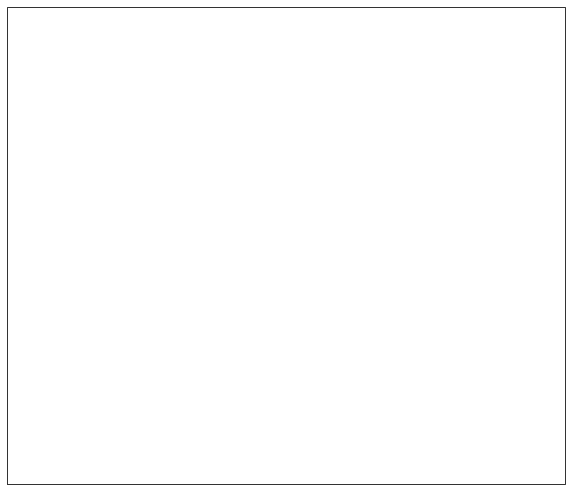

In [287]:
#create a map view
myFig = plt.figure(figsize=(10, 10))

#define my crs as UTM ref
myCRS = ccrs.UTM(51)

#create an axis on which to plot data
ax = plt.axes(projection=ccrs.Mercator())

In [288]:
# assign and add western highlands polygon from subset (if this doesnt work just load central highlands outline shapefile)
ch_lga_feature = ShapelyFeature(ch_lga['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = ch_lga.total_bounds
ax.add_feature(ch_lga_feature) # add the outline feature to the map.http://localhost:8888/notebooks/egm722_assess_a.ipynb#

In [289]:
# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS) # because total_bounds gives output as xmin, ymin, xmax, ymax,
# but set_extent takes xmin, xmax, ymin, ymax, we re-order the coordinates here.

In [290]:
#to plot rock type we need to first define how many unique rock types there are (10)
num_rock = len(land_clip.ROCK.unique())
print('Number of unique features: {}'.format(num_rock)) # note how we're using {} and format here!

Number of unique features: 10


In [291]:
# pick colors for the individual rock polygons
rock_colors = ['r','lightcoral','deeppink','darkviolet','dodgerblue','yellow','orange','mediumblue','green','skyblue',]


In [292]:
#drop the null values from rock column (i.e. polygons with no names - as in lake areas)
#https://stackoverflow.com/questions/44681776/ignoring-nan-in-a-dataframe
rock_names = land_clip['ROCK'].dropna().unique()
rock_names.sort()
rock_names

array(['Acid igneous (e.g. granite)',
       'Basic igneous (e.g. dolerite, basalt)',
       'Complexes of the above &/or peat deposits',
       'Metamorphic (e.g. quartzite, schist)', 'Quaternary',
       'Sedimentary arenaceous (e.g. sandstone)',
       'Sedimentary argillaceous (e.g. mudstone)',
       'Sedimentary calcareous (e.g. limestone, dolomite)',
       'Sedimentary rudaceous (e.g. conglomerate)'], dtype=object)

In [293]:
# next, add the rock polygon colours to the map using the colors that we've picked.
# here, we're iterating over the unique values in the 'ROCK' field.
# we're also setting the edge color to be black, with a line width of 0.25 pt.
for i, name in enumerate(rock_names):
    feat = ShapelyFeature(land_clip['geometry'][land_clip['ROCK'] == name], myCRS,
                          edgecolor='k',
                          facecolor=rock_colors[i],
                          linewidth=1,
                          alpha=0.25)
    ax.add_feature(feat)


C:\Users\brand\anaconda3\envs\egm722_assess\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\brand\anaconda3\envs\egm722_assess\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\brand\anaconda3\envs\egm722_assess\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


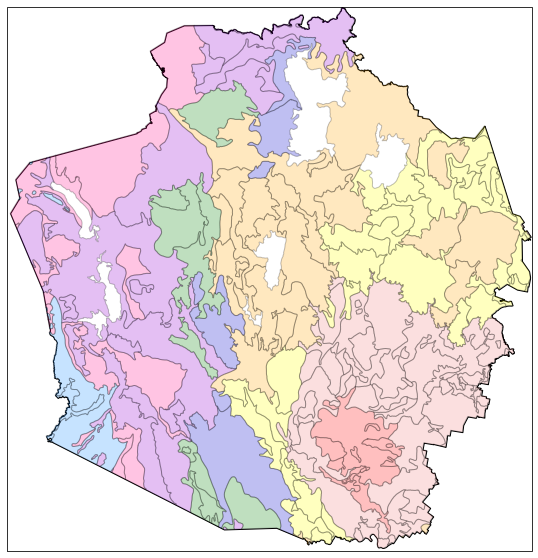

In [294]:
# show figure here
myFig 

In [ ]:
#add remaining vectors to map